In [84]:
# Para no tener que reiniciar el kernel
%load_ext autoreload
%autoreload 2

# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np
import pickle

# Visualizaciones
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt

# Para realizar la clasificación y la evaluación del modelo
# -----------------------------------------------------------------------
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [85]:
import sys
sys.path.append("../../")

In [86]:
# Librería para el acceso a variables y funciones
# -----------------------------------------------------------------------

from src import soporte_ajuste_logistica as sal
from src import soporte_logistica_ensamble as sle


In [87]:
import warnings
warnings.filterwarnings("ignore")

In [88]:
df = pd.read_pickle('../../datos/modelo3/datos_preprocesados_y_desbalanceados.pkl')

In [ ]:
df.head()

,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,Age,BusinessTravel,Department,DistanceFromHome,EducationField,JobRole,MaritalStatus,...,JobLevel_Head,JobLevel_Intern,JobLevel_Junior,JobLevel_Manager,JobLevel_Senior,StockOptionLevel_Bad,StockOptionLevel_Best,StockOptionLevel_Better,StockOptionLevel_Good,Attrition
0,0.0,-0.943914735491662,1.0,1.153846,0.0,-1.0,-0.083333,0.0,-0.9450964102808177,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.056085264508337944,1.272172521742468,-0.384615,0.11333267018127957,0.0,0.250000,0.0,0.45135028949859385,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
2,0.505837150879456,0.056085264508337944,5.867264232325414,-0.307692,0.11333267018127957,0.0,0.833333,-5.396956951550586,0.05490358971918225,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,-0.4941628491205439,-0.943914735491662,0.0,0.153846,-0.07045481309786648,0.0,-0.416667,0.0,-1.5957948681964722,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,-0.4941628491205439,1.2512174887022243,0.0,-0.307692,0.0,0.0,0.250000,0.07620631831817355,0.05490358971918225,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
df = df.astype(float)

### REGRESIÓN

In [ ]:
logistica = sle.AnalisisModelosClasificacion(dataframe = df, variable_dependiente = "Attrition")

# llamamos a la función para ajustar el modelo
logistica.ajustar_modelo("logistic_regression")

# llamamos al metodo para obtener los resultaods de las predicciones
df_resultados_regresion = logistica.calcular_metricas(modelo_nombre = "logistic_regression")
df_resultados_regresion["modelo"] = "logistic_regression"
df_resultados_regresion

,accuracy,precision,recall,f1,kappa,auc,time_seconds,n_jobs,tiempo_computacion(segundos),nucleos_usados,modelo
train,0.836725,0.837051,0.836725,0.836684,0.673445,0.916441,0.006981,NaN,NaN,NaN,logistic_regression
test,0.839319,0.839447,0.839319,0.839308,0.678649,0.903173,NaN,NaN,0.006981,NaN,logistic_regression


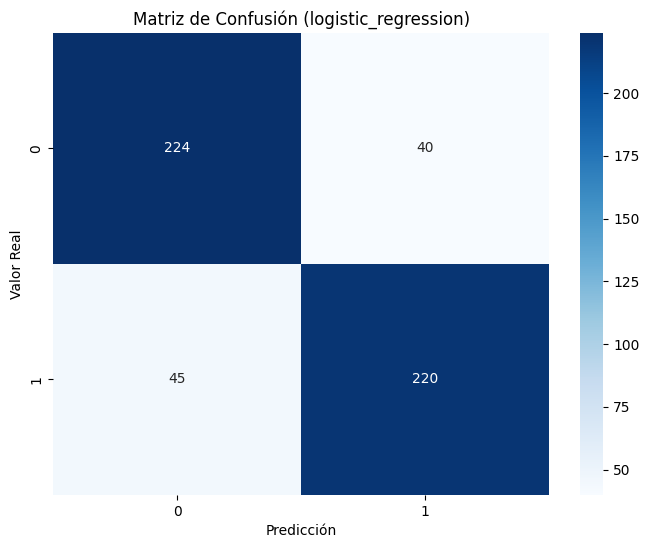

In [ ]:
logistica.plot_matriz_confusion("logistic_regression")

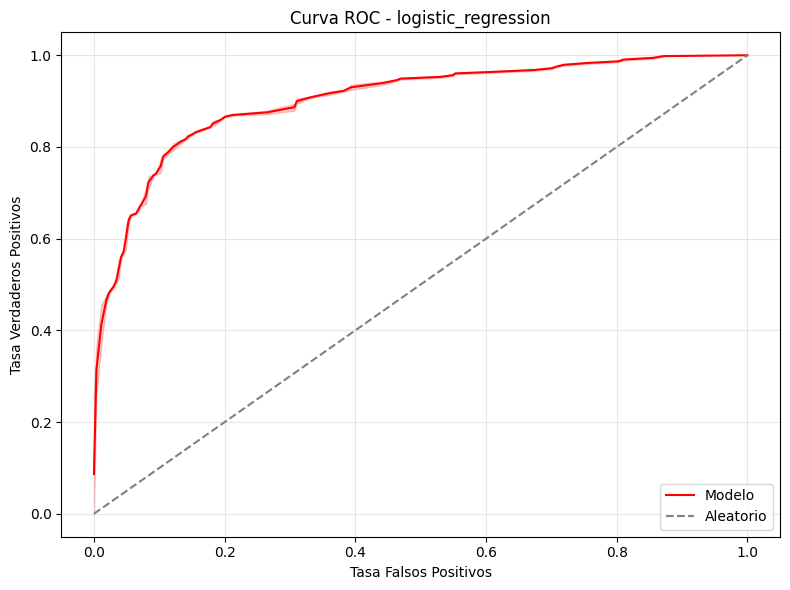

In [ ]:
logistica.plot_curva_roc("logistic_regression")

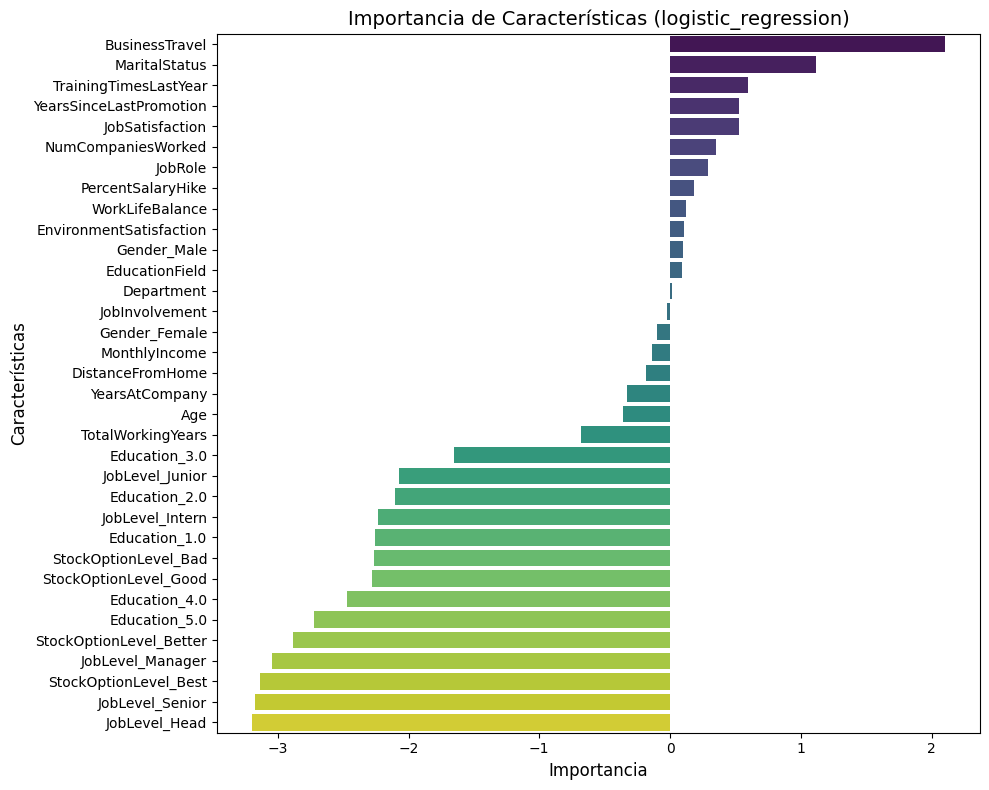

In [ ]:
logistica.importancia_predictores("logistic_regression")

### DECISION TREE

In [ ]:
logistica = sle.AnalisisModelosClasificacion(dataframe = df, variable_dependiente = "Attrition")

# llamamos a la función para ajustar el modelo
logistica.ajustar_modelo("tree")

# llamamos al metodo para obtener los resultaods de las predicciones
df_resultados_tree = logistica.calcular_metricas(modelo_nombre = "tree")
df_resultados_tree["modelo"] = "tree"
df_resultados_tree 

Fitting 5 folds for each of 36 candidates, totalling 180 fits
El mejor modelo es DecisionTreeClassifier(max_depth=10, min_samples_split=10, random_state=42)


,accuracy,precision,recall,f1,kappa,auc,time_seconds,n_jobs,tiempo_computacion(segundos),nucleos_usados,modelo
train,0.905821,0.905851,0.905821,0.905820,0.811643,0.972101,0.00798,4.0,NaN,NaN,tree
test,0.807183,0.808027,0.807183,0.807039,0.614327,0.854395,NaN,NaN,0.00798,4.0,tree


En este modelo las metricas son francamente mejores, si acaso, la kappa del test es algo inferior a las otras, pero es un modelo, que pese al desbalanceo predice bastante bien positivos y negativos.

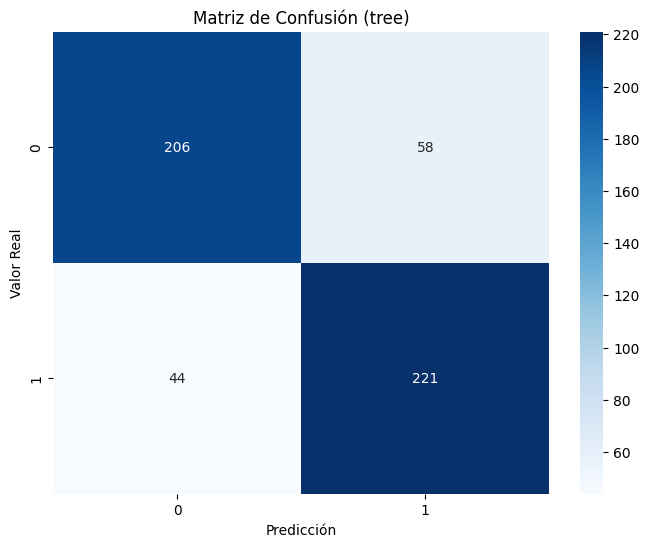

In [ ]:
logistica.plot_matriz_confusion("tree")

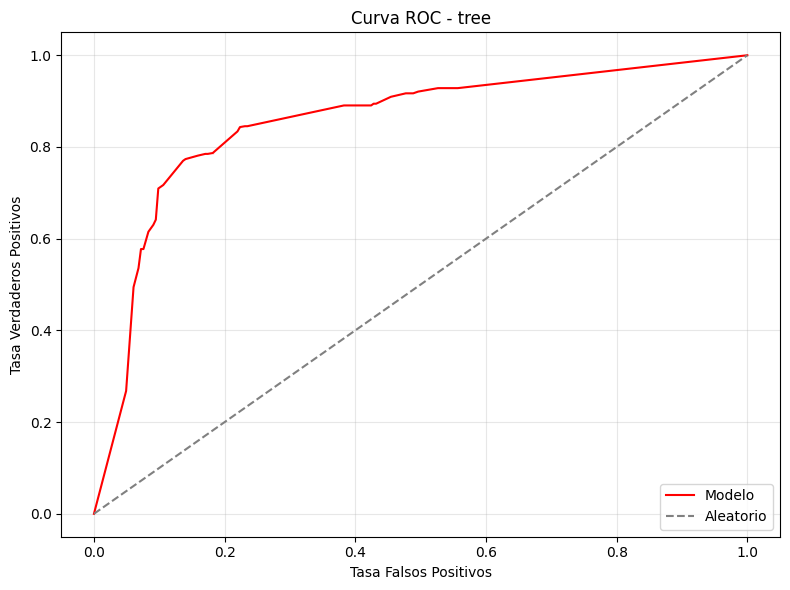

In [ ]:
logistica.plot_curva_roc("tree")

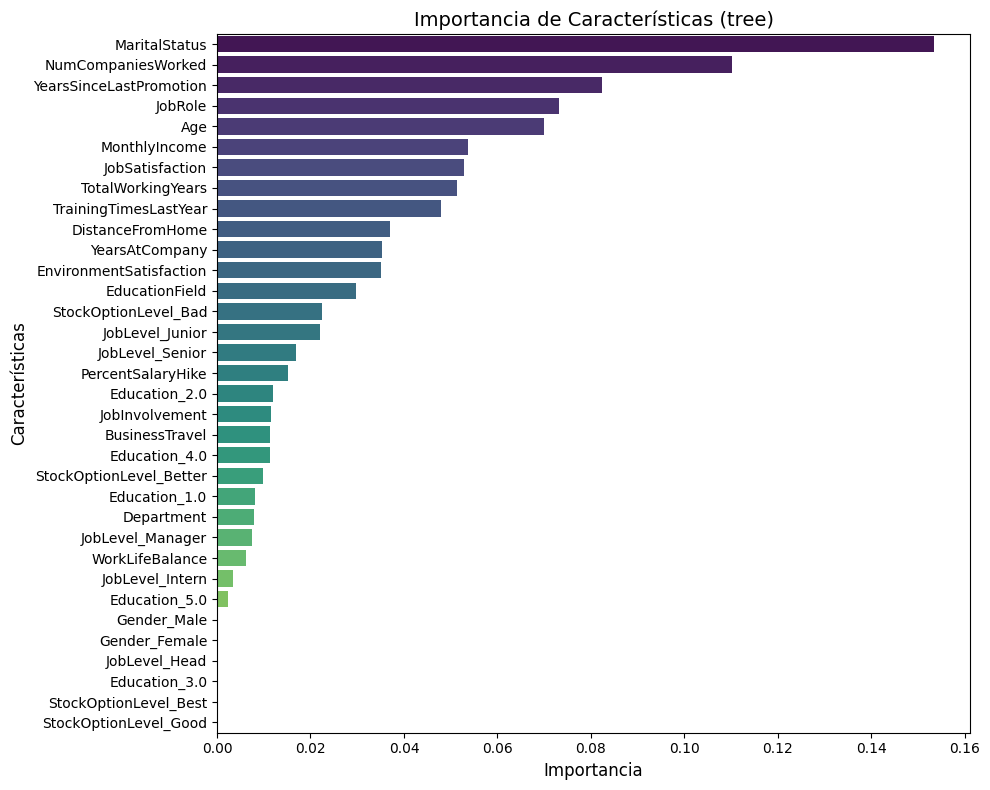

In [ ]:
logistica.importancia_predictores("tree")

### RANDOM FOREST

In [ ]:
logistica = sle.AnalisisModelosClasificacion(dataframe = df, variable_dependiente = "Attrition")

# llamamos a la función para ajustar el modelo
logistica.ajustar_modelo("random_forest")

# llamamos al metodo para obtener los resultaods de las predicciones
df_resultados_rf = logistica.calcular_metricas(modelo_nombre = "random_forest")
df_resultados_rf["modelo"] = "random_forest"
df_resultados_rf 

Fitting 5 folds for each of 108 candidates, totalling 540 fits
El mejor modelo es RandomForestClassifier(max_depth=15, n_estimators=50, n_jobs=-1,
                       random_state=42)


,accuracy,precision,recall,f1,kappa,auc,time_seconds,n_jobs,tiempo_computacion(segundos),nucleos_usados,modelo
train,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.064826,-1.0,NaN,NaN,random_forest
test,0.911153,0.914874,0.911153,0.910962,0.822337,0.958412,NaN,NaN,0.064826,-1.0,random_forest


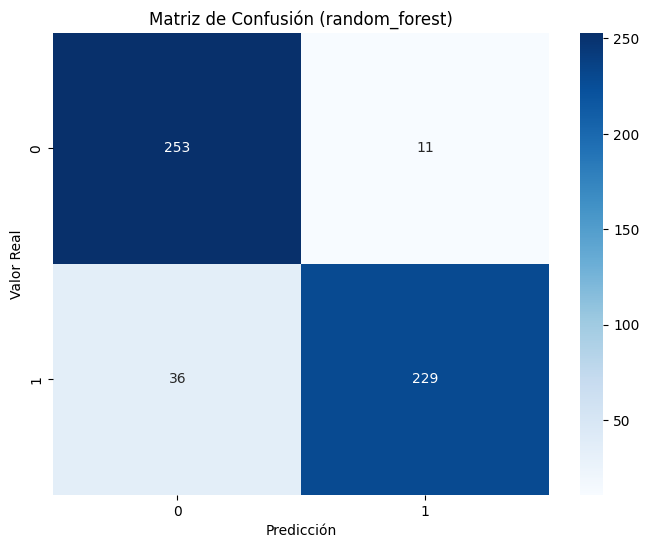

In [ ]:
logistica.plot_matriz_confusion("random_forest")

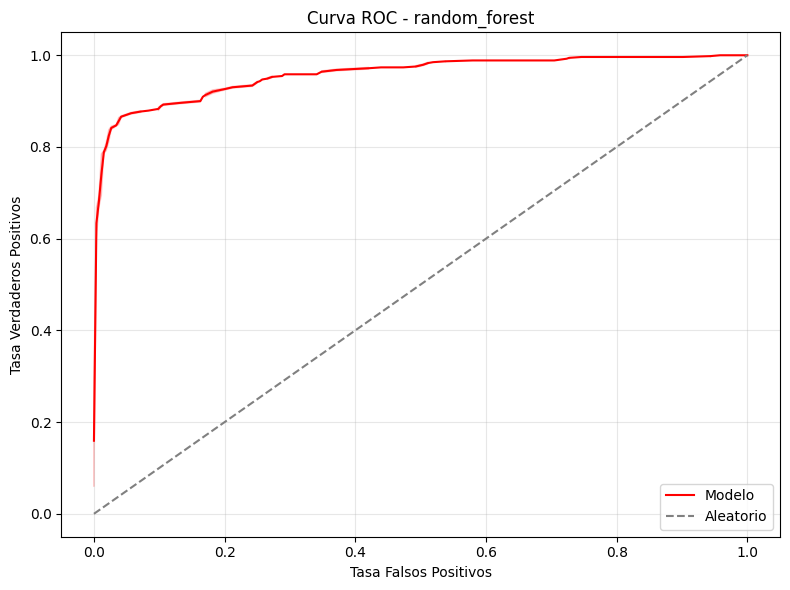

In [ ]:
logistica.plot_curva_roc("random_forest")

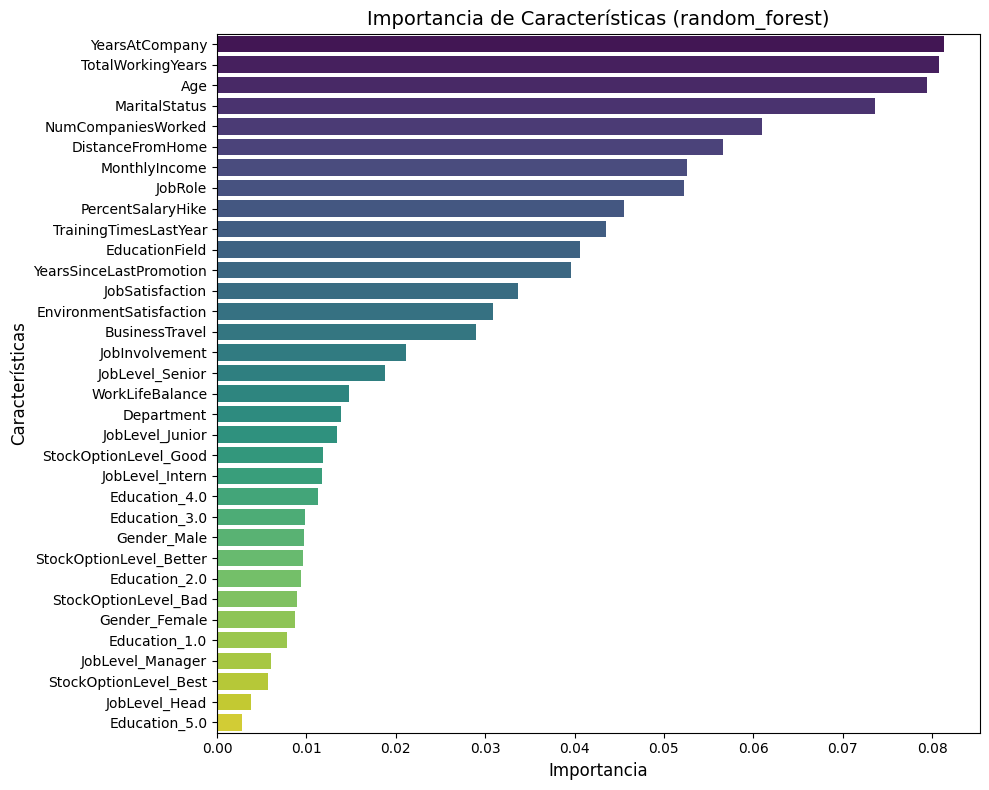

In [ ]:
logistica.importancia_predictores("random_forest")

### Gradient Boosting

In [ ]:
# llamamos a la función para ajustar el modelo
logistica.ajustar_modelo("gradient_boosting")

# llamamos al metodo para obtener los resultaods de las predicciones
df_resultados_gb = logistica.calcular_metricas(modelo_nombre = "gradient_boosting")
df_resultados_gb["modelo"] = "gradient_boosting"
df_resultados_gb 

Fitting 5 folds for each of 144 candidates, totalling 720 fits
El mejor modelo es GradientBoostingClassifier(learning_rate=0.2, max_depth=4, min_samples_leaf=2,
                           min_samples_split=10, n_estimators=150,
                           random_state=42)


,accuracy,precision,recall,f1,kappa,auc,time_seconds,n_jobs,tiempo_computacion(segundos),nucleos_usados,modelo
train,0.999527,0.999527,0.999527,0.999527,0.999053,1.000000,0.012965,4.0,NaN,NaN,gradient_boosting
test,0.909263,0.913271,0.909263,0.909052,0.818559,0.950057,NaN,NaN,0.012965,4.0,gradient_boosting


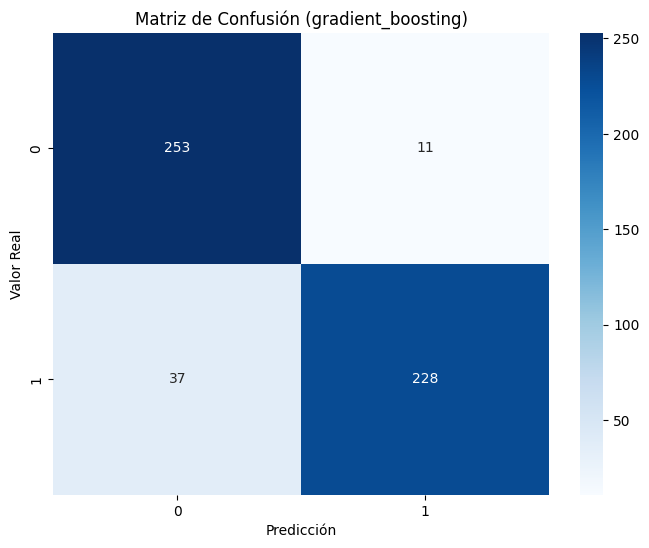

In [ ]:
logistica.plot_matriz_confusion("gradient_boosting")

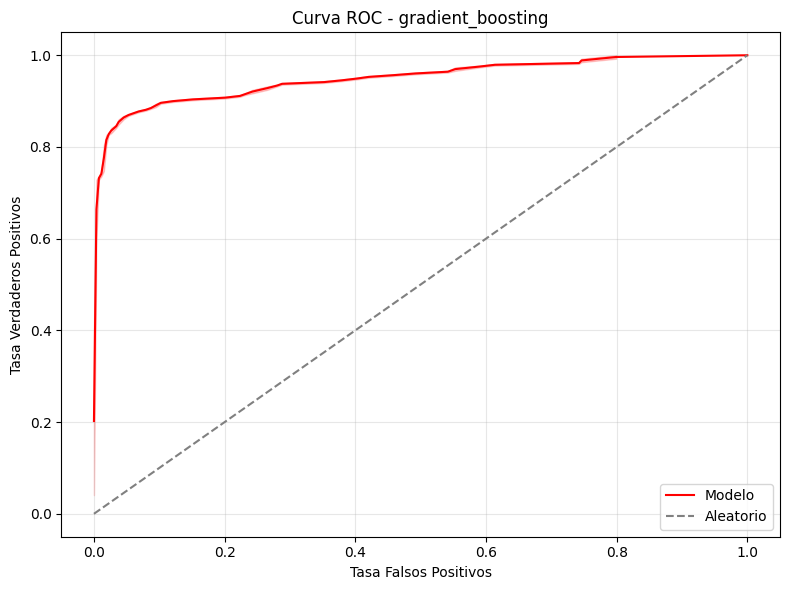

In [ ]:
logistica.plot_curva_roc("gradient_boosting")

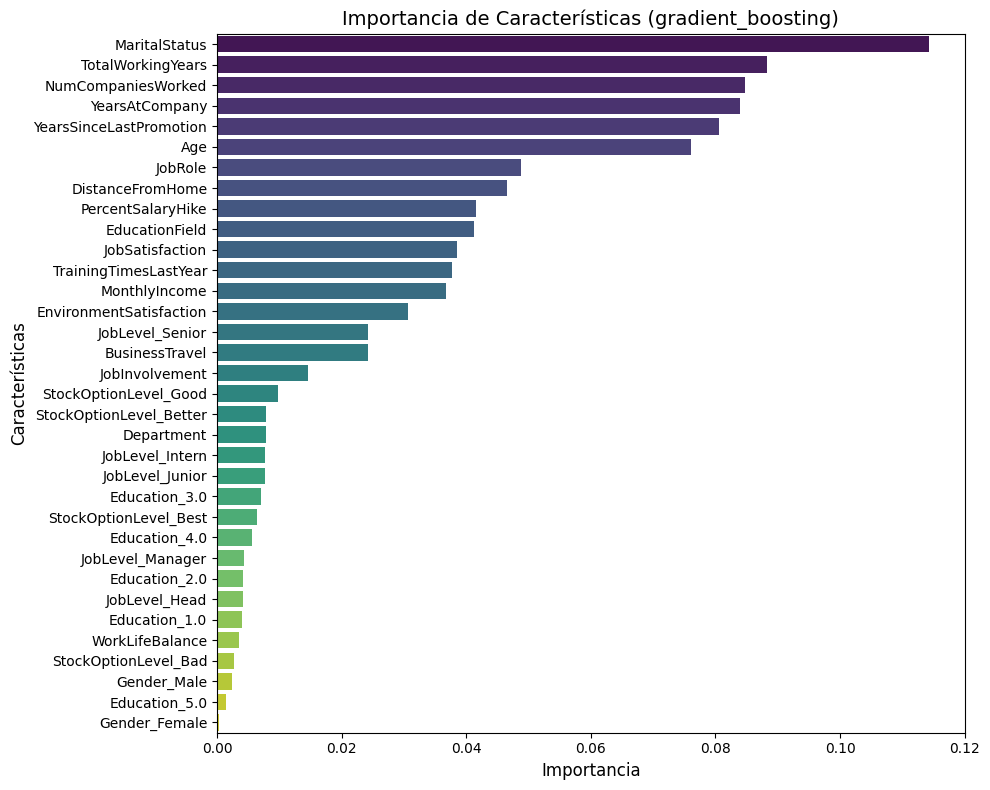

In [ ]:
logistica.importancia_predictores("gradient_boosting")

In [ ]:
# llamamos a la función para ajustar el modelo
logistica.ajustar_modelo("xgboost")

# llamamos al metodo para obtener los resultaods de las predicciones
df_resultados_xg = logistica.calcular_metricas(modelo_nombre = "xgboost")
df_resultados_xg["modelo"] = "xgboost"
df_resultados_xg 

Fitting 5 folds for each of 144 candidates, totalling 720 fits
El mejor modelo es XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=1.0, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=8, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)


,accuracy,precision,recall,f1,kappa,auc,time_seconds,n_jobs,tiempo_computacion(segundos),nucleos_usados,modelo
train,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,0.054853,NaN,NaN,NaN,xgboost
test,0.916824,0.918003,0.916824,0.91677,0.833664,0.964909,NaN,NaN,0.054853,NaN,xgboost


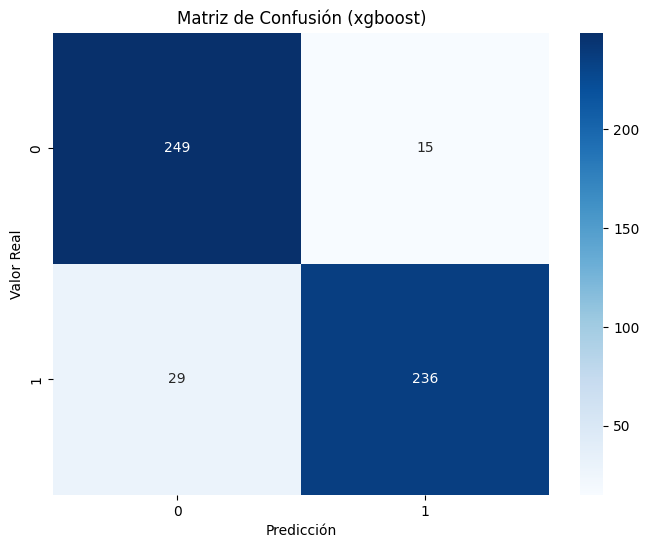

In [ ]:
logistica.plot_matriz_confusion("xgboost")

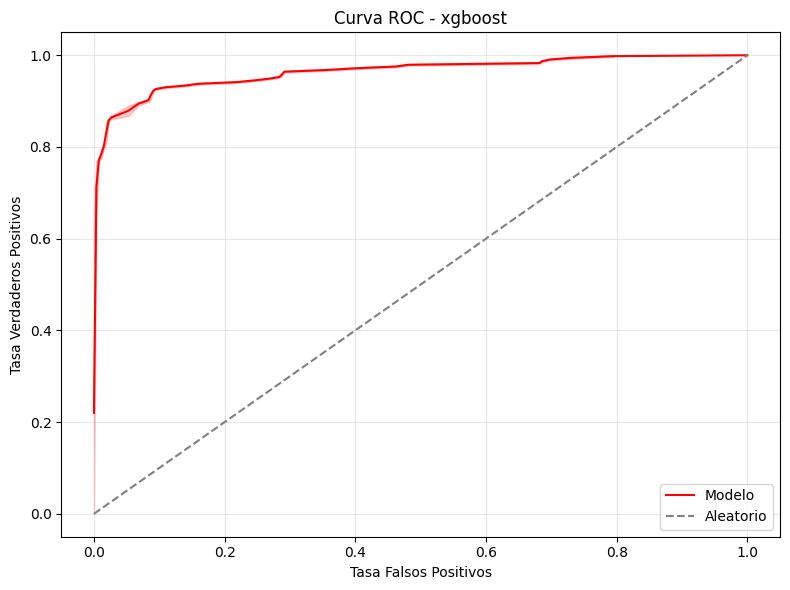

In [ ]:
logistica.plot_curva_roc("xgboost")

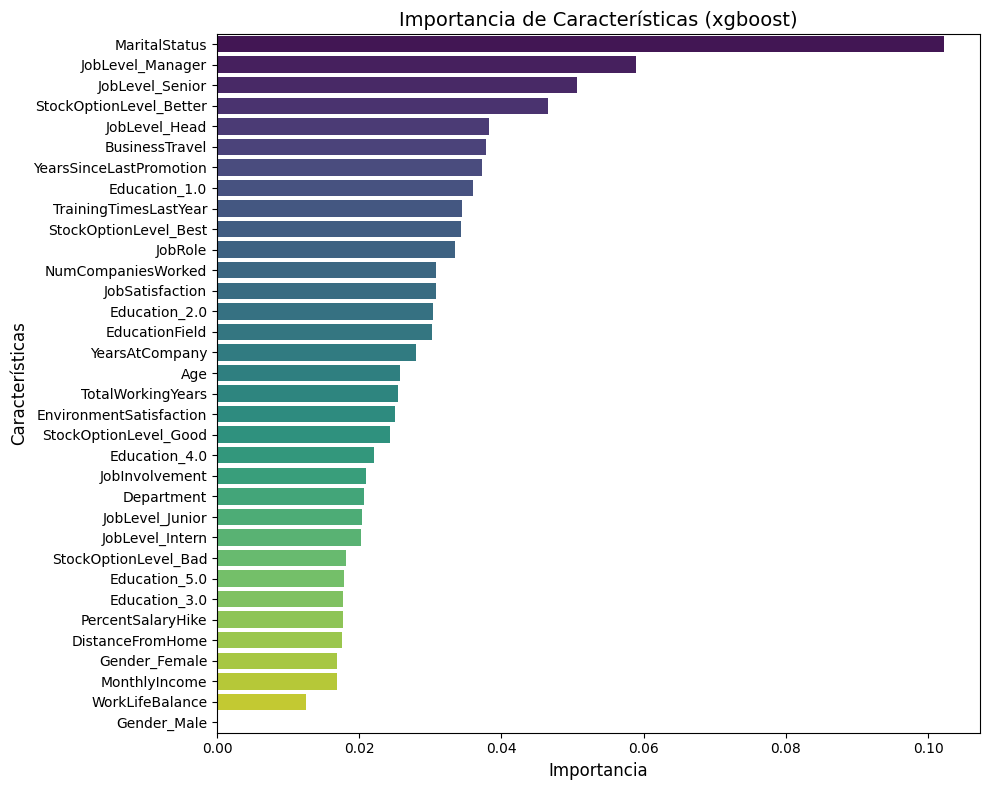

In [ ]:
logistica.importancia_predictores("xgboost")

## CONCLUSIONES

In [ ]:
df_resultados = pd.concat([df_resultados_regresion, df_resultados_tree, df_resultados_rf, df_resultados_gb, df_resultados_xg])
df_resultados.reset_index(drop=True, inplace=True)
df_resultados = df_resultados.drop(columns=["n_jobs", "nucleos_usados","time_seconds","tiempo_computacion(segundos)"])
df_resultados

,accuracy,precision,recall,f1,kappa,auc,modelo
0,0.836725,0.837051,0.836725,0.836684,0.673445,0.916441,logistic_regression
1,0.839319,0.839447,0.839319,0.839308,0.678649,0.903173,logistic_regression
2,0.905821,0.905851,0.905821,0.905820,0.811643,0.972101,tree
3,0.807183,0.808027,0.807183,0.807039,0.614327,0.854395,tree
4,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,random_forest
5,0.911153,0.914874,0.911153,0.910962,0.822337,0.958412,random_forest
6,0.999527,0.999527,0.999527,0.999527,0.999053,1.000000,gradient_boosting
7,0.909263,0.913271,0.909263,0.909052,0.818559,0.950057,gradient_boosting
8,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,xgboost
9,0.916824,0.918003,0.916824,0.916770,0.833664,0.964909,xgboost


Al corregir el desbalanceo las métricas mejoran mucho con respecto al modelo 2. Todos los métodos presentan overfitting, bastange menos que el modelo 2, pero  aún asi notable. El mejor metodo de predicción es el xgboost en cuánto a métricas, aunque es cierto que el random forest le anda muy cerca con un tiempo de ejecución inferior. De todos modos, el tiempo de ejecución del xgboost es 1 minuto 50 segundos, es bastante asumible, así que será con el que nos quedemos.

En cuánto a la interpretación de las métricas, vemos que tenemos una kappa en el test de 0.83, por lo que hay muy poca aleatoriedad en la predicción, las métricas de accuracy, recall y f1 son altas, mayores a 0.91 y muy equilibradas, por lo que podemos decir que no interpreta peor los positivos que los negativos y viceversa.

 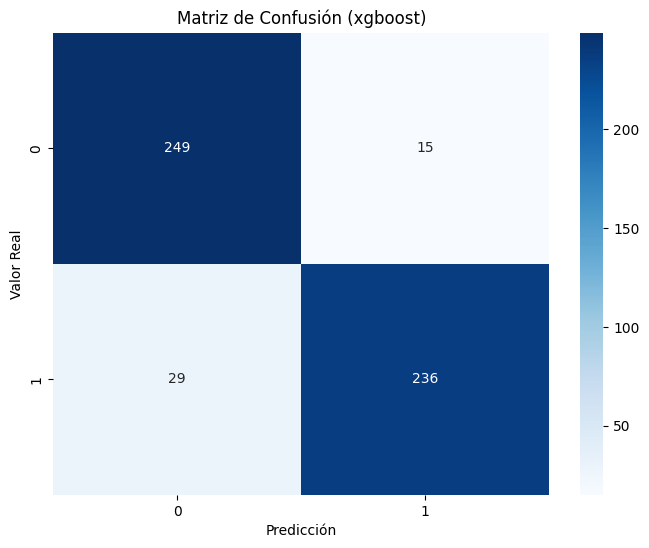

 Mirando la matriz de precision vemos que tenemos muchos más verdaderos negativos (249) y verdaderos negativos (236) que falsos negativos (29) y falsos positivos (15). Todo ello, junto con la curva ROC que se puede observar más arriba, ratifica que estamos ante un modelo adecuado para hacer predicciones y sacar conclusiones de valor.

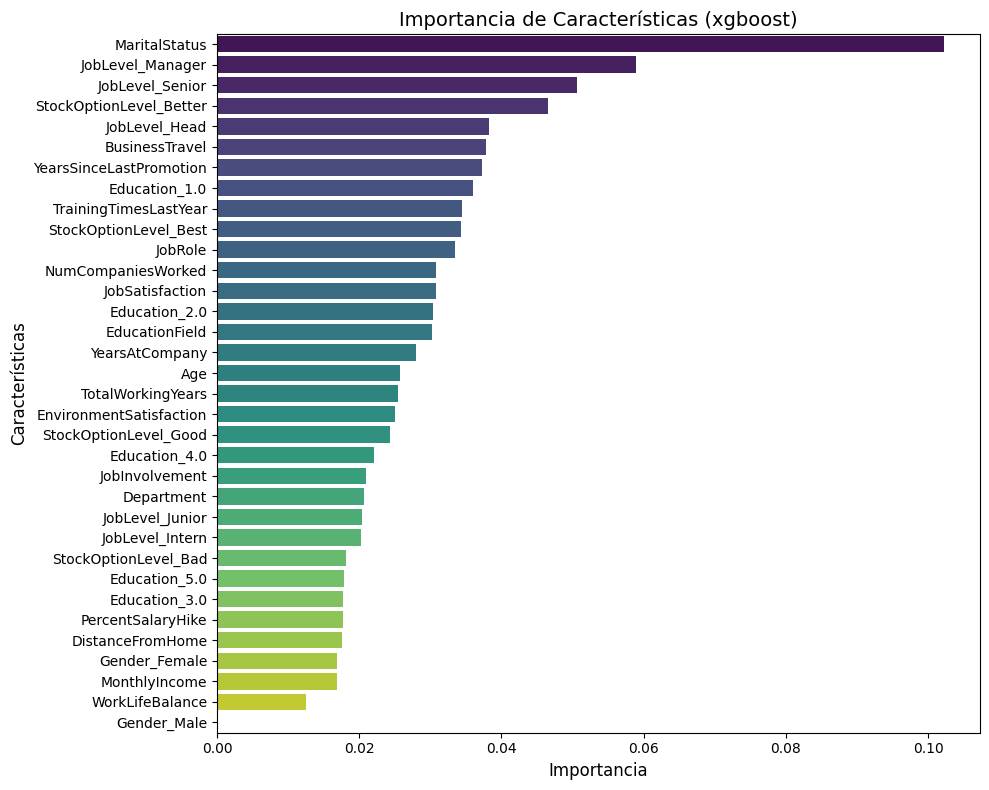

Vemos que el estatus marital es un factor clave en la predicción de si el empleado se quedará o se irá de la empresa. En este sentido, es lógico que los casados busquen una mayor estabilidad, mientras que alguien soltero, sea más propenso al cambio por tener menos ataduras. También vemos que influye mucho el tener un nivel alto de empleo (senior, manager o head), así como un buen plan de stock de acciones de la empresa, el viajar mucho por trabajo, o los años desde la última promoción laboral.

En contraste, vemos que factres como el balance de trabajo y vida personal, el genero, el sueldo mensual o la Distancia a casa no tienen gran importancia, en algunso casos, como el genero quiza porque el ser hombre o mujer no sea importante respecto a a satisfacción laboral al menos en este caso, las otras categorías, dado que en principio podríamsosuponer que sí que son importantes, se puede asumir, que se satsifacen de manera parecida en la mayoría de empleados y no suponen un facor que marque la diferendia.

## Mejoras y next steps

- Corregir el overfitting.

- Analizar si al corregir el desbalanceo, se han introducido sesgos en la variable respuesta (por ejemplo si los "No" generados artificialmente tienen característias muy paredidas entre ellos, o diferentes a los que ya existían)

- Hacer un modelo predictivo basado en los duplicados que se eliminaron y comparar concluisones con este modelo.

- Introducir mejoras en el preprocesamiento (probar un tratamiento diferente de nulos y outliers y probar otros métodos de estandarización)